In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load Data / Data Exploration

In [2]:
url = "https://raw.githubusercontent.com/mturner49/8600-deep-learning-project/main/data/CNN_Articels_clean.csv"

data = pd.read_csv(url)
data.head()

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
0,0,"Jacopo Prisco, CNN",2021-07-15 02:46:59,news,world,https://www.cnn.com/2021/07/14/world/tusimple-...,"There's a shortage of truckers, but TuSimple t...",The e-commerce boom has exacerbated a global t...,"world, There's a shortage of truckers, but TuS...","There's a shortage of truckers, but TuSimple t...","(CNN)Right now, there's a shortage of truck d..."
1,2,"Stephanie Bailey, CNN",2021-05-12 07:52:09,news,world,https://www.cnn.com/2021/05/12/world/ironhand-...,Bioservo's robotic 'Ironhand' could protect fa...,Working in a factory can mean doing the same t...,"world, Bioservo's robotic 'Ironhand' could pro...",A robotic 'Ironhand' could protect factory wor...,(CNN)Working in a factory or warehouse can me...
2,3,"Words by Stephanie Bailey, video by Zahra Jamshed",2021-06-16 02:51:30,news,asia,https://www.cnn.com/2021/06/15/asia/swarm-robo...,This swarm of robots gets smarter the more it ...,"In a Hong Kong warehouse, a swarm of autonomou...","asia, This swarm of robots gets smarter the mo...",This swarm of robots gets smarter the more it ...,"(CNN)In a Hong Kong warehouse, a swarm of aut..."
3,4,"Paul R. La Monica, CNN Business",2022-03-15 09:57:36,business,investing,https://www.cnn.com/2022/03/15/investing/brics...,Russia is no longer an option for investors. T...,"For many years, the world's most popular emerg...","investing, Russia is no longer an option for i...",Russia is no longer an option for investors. T...,"New York (CNN Business)For many years, the wor..."
4,7,Reuters,2022-03-15 11:27:02,business,business,https://www.cnn.com/2022/03/15/business/russia...,Russian energy investment ban part of new EU s...,The European Union formally approved on Tuesda...,"business, Russian energy investment ban part o...",EU bans investment in Russian energy in new sa...,The European Union formally approved on Tuesda...


In [30]:
print('Data type of each column of data :')
print(data.dtypes)

Data type of each column of data :
Index                  int64
Author                object
Date published        object
Category              object
Section               object
Url                   object
Headline              object
Description           object
Keywords              object
Second headline       object
Article text          object
MonthYear          period[M]
dtype: object


## Visualization

In [3]:
cat_counts = data['Category'].value_counts()
list(cat_counts)
labels = cat_counts.index.tolist()
labels

['sport', 'news', 'business', 'politics', 'entertainment', 'health']

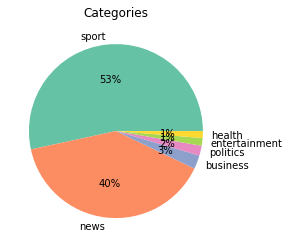

In [14]:
# Create pie chart of Category counts
plt.pie(list(cat_counts), labels = labels, colors = sns.color_palette('Set2'), autopct='%.0f%%')
plt.title('Categories')
plt.show()

In [5]:
sec_counts = data['Section'].value_counts()
list(sec_counts)
sec_labels = sec_counts.index.tolist()
sec_labels

['sport',
 'europe',
 'football',
 'uk',
 'tennis',
 'golf',
 'us',
 'australia',
 'motorsport',
 'politics',
 'entertainment',
 'health',
 'africa',
 'opinions',
 'world',
 'perspectives',
 'business',
 'weather',
 'tech',
 'investing',
 'success',
 'asia',
 'economy',
 'living',
 'homes',
 'middleeast',
 'china',
 'americas',
 'energy',
 'business-money',
 'media',
 'intl_world',
 'movies',
 'india',
 'celebrities',
 'business-food',
 'cars']

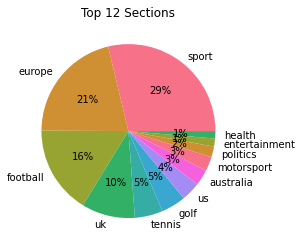

sport             1088
europe             800
football           618
uk                 376
tennis             197
golf               173
us                 134
australia          114
motorsport         100
politics            75
entertainment       56
health              52
africa              49
opinions            45
world               44
perspectives        25
business            23
weather             18
tech                15
investing            9
success              9
asia                 9
economy              8
living               7
homes                6
middleeast           5
china                5
americas             3
energy               3
business-money       2
media                2
intl_world           1
movies               1
india                1
celebrities          1
business-food        1
cars                 1
Name: Section, dtype: int64

In [16]:
# Create barplot of Section counts
plt.pie(list(sec_counts)[0:12], labels = sec_labels[0:12], colors = sns.color_palette("husl", 8), autopct='%.0f%%')
plt.title('Top 12 Sections')
plt.show()
data['Section'].value_counts()

In [7]:
data['Date published']

0       2021-07-15 02:46:59
1       2021-05-12 07:52:09
2       2021-06-16 02:51:30
3       2022-03-15 09:57:36
4       2022-03-15 11:27:02
               ...         
4071    2021-12-01 10:01:29
4072    2021-12-01 17:56:15
4073    2021-12-01 11:32:15
4074    2021-12-01 17:27:34
4075    2021-12-01 14:32:33
Name: Date published, Length: 4076, dtype: object

In [8]:
data['MonthYear'] = pd.to_datetime(data['Date published'])

In [9]:
data['MonthYear'] = data['MonthYear'].dt.to_period('M')

In [10]:
df=data.groupby(['MonthYear']).count().sort_values(['MonthYear'])
df

,Index,Author,Date published,Category,Section,Url,Headline,Description,Keywords,Second headline,Article text
MonthYear,,,,,,,,,,,
2012-12,6,6,6,6,6,6,6,6,6,6,6
2013-01,1,1,1,1,1,1,1,1,1,1,1
2013-02,2,2,2,2,2,2,2,2,2,2,2
2013-03,2,2,2,2,2,2,2,2,2,2,2
2013-04,1,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
2021-11,365,365,365,365,365,365,365,365,365,365,365
2021-12,307,307,307,307,307,307,307,307,307,307,307
2022-01,45,45,45,45,45,45,45,45,45,45,45


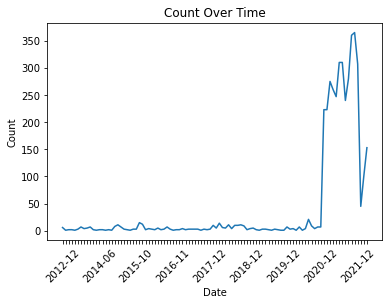

In [11]:
fig, ax = plt.subplots()
plt.plot(df.index.astype(str),df['Index'])
plt.title('Count Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.xticks(rotation=45)
every_nth = 12
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.show()